In [1]:
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from plot_util import plot_history

Using TensorFlow backend.


In [2]:
MAX_FEATURES = 10000
MAXLEN = 500

In [3]:
(train_x, train_y), (test_x, text_y) = imdb.load_data(num_words=MAX_FEATURES)

train_x = [x[::-1] for x in train_x]
test_x = [x[::-1] for x in test_x]

train_x = pad_sequences(train_x, maxlen=MAXLEN)
test_x = pad_sequences(test_x, maxlen=MAXLEN)

In [4]:
model = Sequential()
model.add(Embedding(MAX_FEATURES, 128))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
history = model.fit(
    train_x, train_y, epochs=10, batch_size=128, 
    validation_split=0.2,
    verbose=2
)

Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
 - 67s - loss: 0.4906 - acc: 0.7672 - val_loss: 0.4409 - val_acc: 0.8330
Epoch 2/10
 - 65s - loss: 0.3151 - acc: 0.8780 - val_loss: 0.3818 - val_acc: 0.8338
Epoch 3/10
 - 65s - loss: 0.2534 - acc: 0.9071 - val_loss: 0.3204 - val_acc: 0.8708
Epoch 4/10
 - 65s - loss: 0.2180 - acc: 0.9229 - val_loss: 0.4680 - val_acc: 0.8590
Epoch 5/10
 - 65s - loss: 0.1933 - acc: 0.9326 - val_loss: 0.3786 - val_acc: 0.8744
Epoch 6/10
 - 66s - loss: 0.1750 - acc: 0.9387 - val_loss: 0.3831 - val_acc: 0.8760
Epoch 7/10
 - 66s - loss: 0.1665 - acc: 0.9456 - val_loss: 0.4061 - val_acc: 0.8764
Epoch 8/10
 - 66s - loss: 0.1439 - acc: 0.9529 - val_loss: 0.5176 - val_acc: 0.8432
Epoch 9/10
 - 66s - loss: 0.1318 - acc: 0.9571 - val_loss: 0.4118 - val_acc: 0.8648
Epoch 10/10
 - 65s - loss: 0.1221 - acc: 0.9607 - val_loss: 0.5133 - val_acc: 0.8688


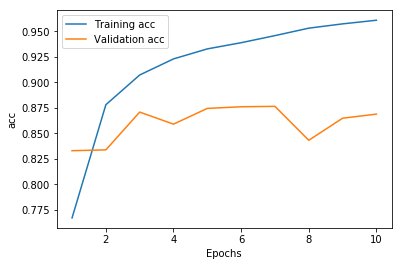

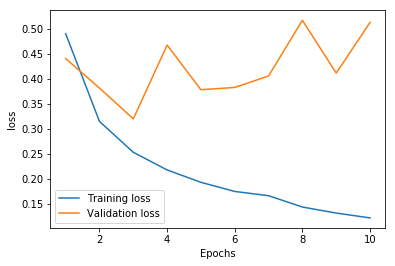

In [6]:
plot_history(history, metrics=['acc', 'loss'])